In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def func(c,x):
    return x**2+c

In [3]:
def iteration(re,img,num = 100):
    x = complex(re,img)
    X = list()
    num_iter = num
    for _ in range(num_iter):
        X.append(x)
        x = func(c,x)
    real = [x.real for x in X]
    img = [x.imag for x in X]
    return real, img

## Playing with $z_0$

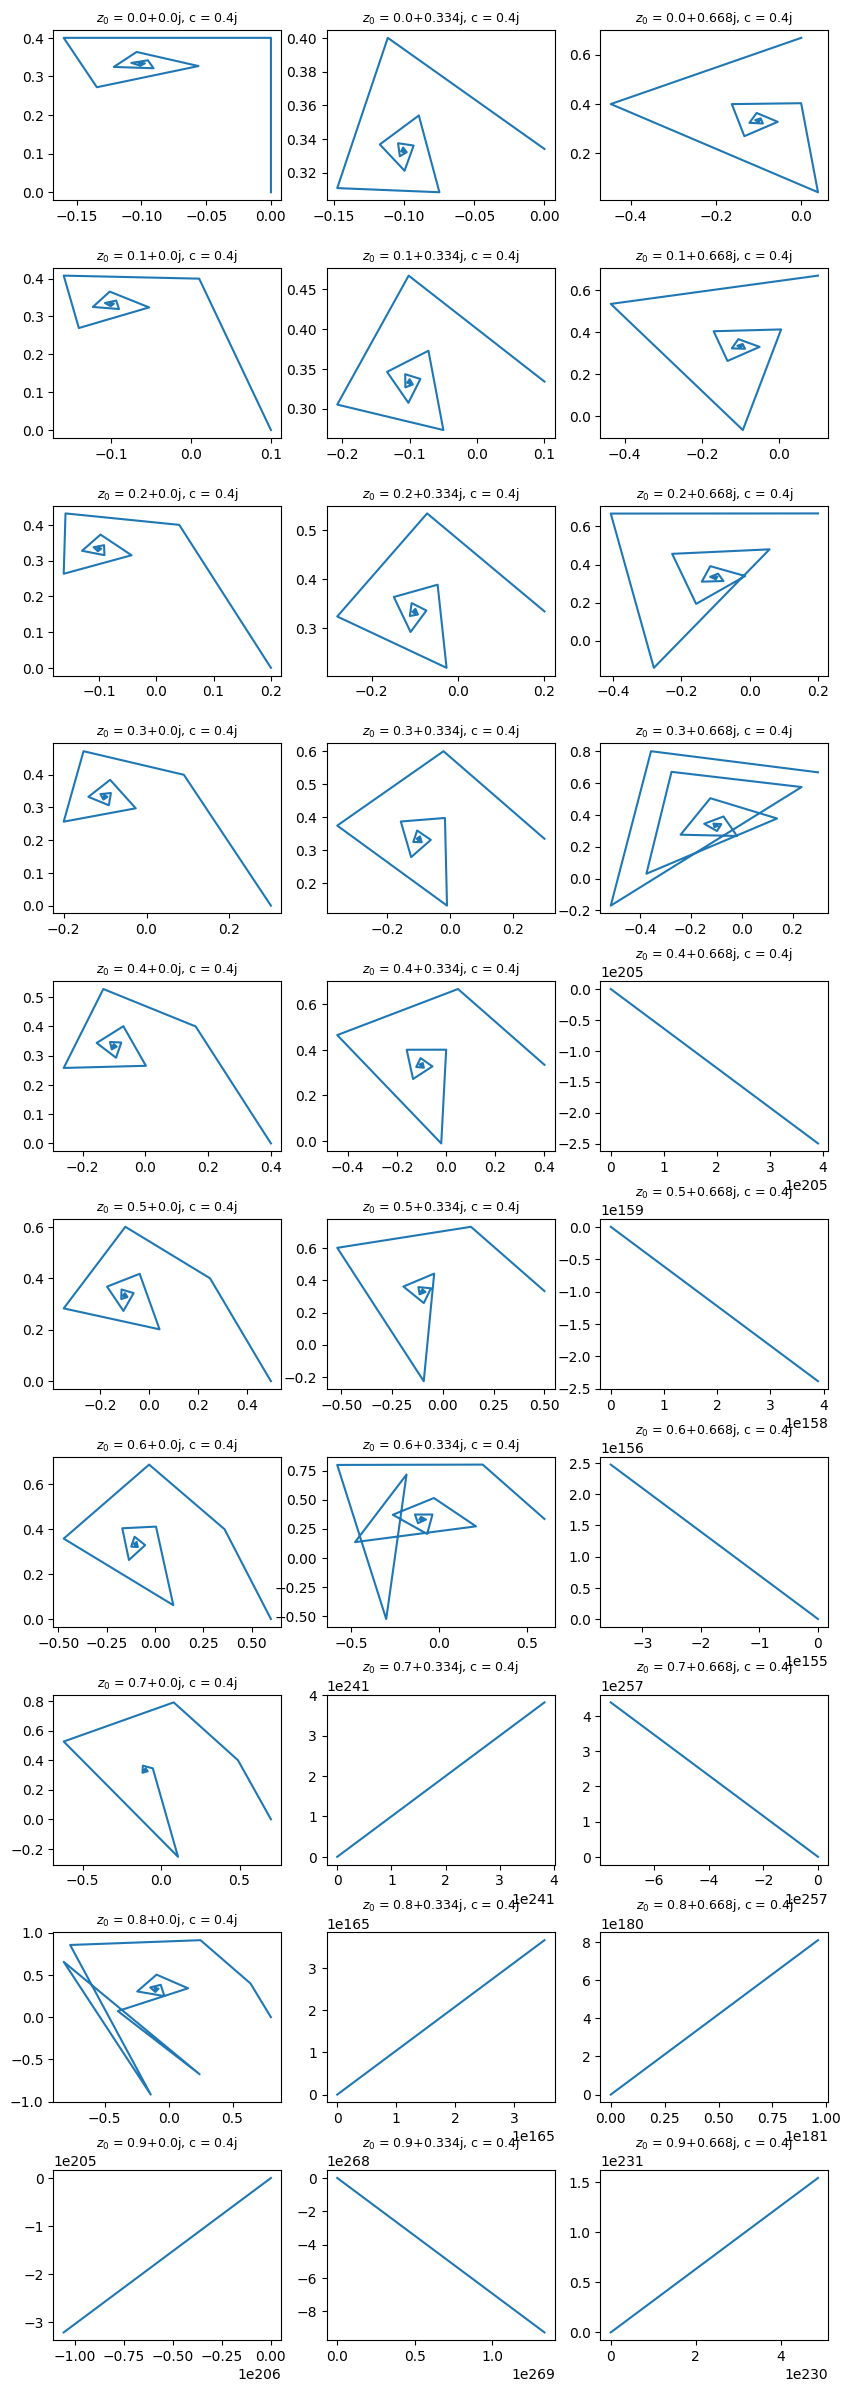

In [70]:
real = np.arange(0, 1, 0.1)
imag = np.arange(0, 1, 0.334)
fig, axes = plt.subplots(len(real), len(imag))
plt.subplots_adjust(hspace=0.4)
c = 0.4j

for i, re in enumerate(real):
    for j, img in enumerate(imag):
        x, y = iteration(re,img,50)
        axes[i,j].plot(x,y)
        axes[i,j].set_title(f'$z_0$ = {round(re,3)}+{img}j, c = {c}',size = 9)
        fig.set_figheight(30)
        fig.set_figwidth(10)

## Playing with $c$

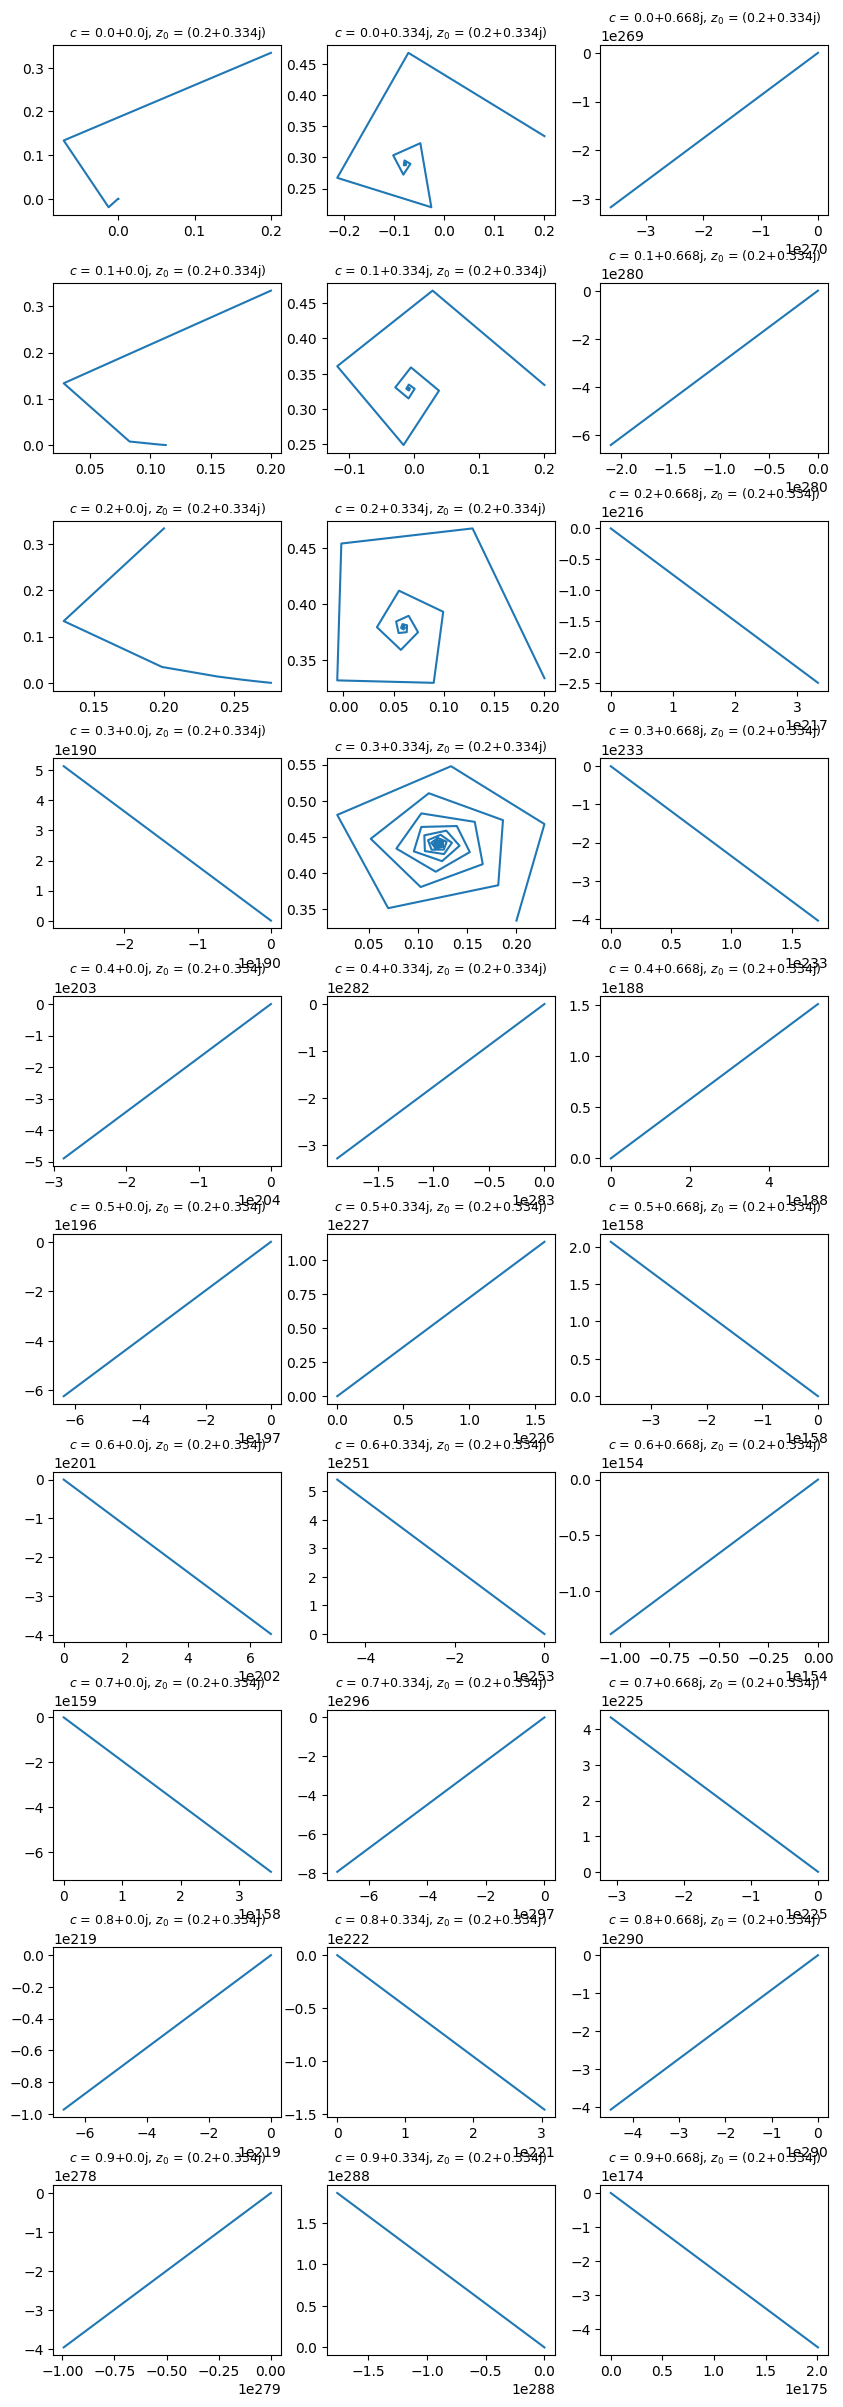

In [72]:
real = np.arange(0, 1, 0.1)
imag = np.arange(0, 1, 0.334)
fig, axes = plt.subplots(len(real), len(imag))
plt.subplots_adjust(hspace=0.4)
z0 = 0.2 + 0.334j

for i, re in enumerate(real):
    for j, img in enumerate(imag):
        c = complex(re,img)
        x, y = iteration(0.2,0.334,50)
        axes[i,j].plot(x,y)
        axes[i,j].set_title(f'$c$ = {round(re,3)}+{img}j, $z_0$ = {z0}',size = 9)
        fig.set_figheight(30)
        fig.set_figwidth(10)

In [4]:
def julia(c=0, xres=700, yres=700, xmin=-1.3, xmax=1.3, ymin=-1.3, ymax=1.3, zmax = 25, iterations = 5000):
    
    julia = np.zeros((xres,yres))
    width = xmax - xmin
    height =ymax - ymin

    for ys in range(yres):
        for xs in range(xres):
            z = complex(ys/yres*height + ymin, xs/xres*width + xmin)
            
            i = 0
            while i<=iterations and abs(z)<zmax:          
                z = z**2 + c
                i += 1
            ratio = i/iterations
            julia[xs,ys] = ratio
            #if abs(z) < zmax:
                #julia[xs,ys] = 0
            #else:
                #julia[xs,ys] = 1
    return julia
    

In [47]:
res = julia(c = -0.1-0.65j)

In [48]:
fig, ax = plt.subplots(figsize=(16,12),dpi=800)
ax.imshow(res, interpolation='nearest', cmap=cm.Greys)
plt.axis('off');

Let's use another colormap:

In [58]:
fig, ax = plt.subplots(figsize=(16,12),dpi=800)
ax.imshow(res, interpolation='nearest', cmap=cm.terrain)
plt.axis('off');

## Golden ratio:

In [81]:
r = 1.61803398875
c = 1 - r
julia_golden = julia(c=c, xres=700, yres=700, xmin=-1.7, xmax=1.7, ymin=-1.7, ymax=1.7, zmax = 10, iterations = 2500)

In [86]:
fig, ax = plt.subplots(figsize=(18,14),dpi=800)
ax.imshow(julia_golden, extent=[-1.7,1.7,-1.7,1.7], interpolation='nearest', cmap=cm.Greys)
plt.xlabel('Re($z_0$)')
plt.ylabel('Im($z_0$)')
plt.axis('on');

In [5]:
a = np.linspace(0, 2*np.pi,100)

In [16]:
plt.ioff()
for ind, c in enumerate(a):
    pic = julia(np.exp(1.j*c), xres=150, yres=150, xmin=-1.7, xmax=1.7, ymin=-1.7, ymax=1.7, zmax = 14, iterations = 800)
    fig, ax = plt.subplots(figsize=(16,12),dpi=800)
    ax.imshow(pic, interpolation='nearest', cmap=cm.terrain)
    plt.axis('off')
    fig.savefig(fr'C:\Users\ivang\Desktop\skoltech_courses\HPPL\julia\{ind+100}animation.png', dpi=500)
    plt.close(fig)

In [2]:
import imageio
import os

path = r'C:\Users\ivang\Desktop\skoltech_courses\HPPL\julia'
images = list()
files = [file for file in os.listdir(path) if file.endswith('.png')]


files.sort()
files

['100animation.png',
 '101animation.png',
 '102animation.png',
 '103animation.png',
 '104animation.png',
 '105animation.png',
 '106animation.png',
 '107animation.png',
 '108animation.png',
 '109animation.png',
 '110animation.png',
 '111animation.png',
 '112animation.png',
 '113animation.png',
 '114animation.png',
 '115animation.png',
 '116animation.png',
 '117animation.png',
 '118animation.png',
 '119animation.png',
 '120animation.png',
 '121animation.png',
 '122animation.png',
 '123animation.png',
 '124animation.png',
 '125animation.png',
 '126animation.png',
 '127animation.png',
 '128animation.png',
 '129animation.png',
 '130animation.png',
 '131animation.png',
 '132animation.png',
 '133animation.png',
 '134animation.png',
 '135animation.png',
 '136animation.png',
 '137animation.png',
 '138animation.png',
 '139animation.png',
 '140animation.png',
 '141animation.png',
 '142animation.png',
 '143animation.png',
 '144animation.png',
 '145animation.png',
 '146animation.png',
 '147animatio

In [45]:
os.chdir(os.getcwd())
with imageio.get_writer('movie.gif', mode='I',fps=10) as writer:
    for file in files:
        image = imageio.imread(file)
        writer.append_data(image)

C:\Users\ivang\AppData\Local\Temp\ipykernel_12080\3114054681.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file)


In [13]:
imageio.help('gif-pil')

GIF-PIL - Compuserve GIF via Pillow

    See :mod:`imageio.plugins.pillow_legacy`



In [18]:
imageio.plugins.pillow_legacy()

TypeError: 'module' object is not callable